<div dir="rtl">
    
# 01. انحدار الشبكة العصبية باستخدام TensorFlow

##### هناك العديد من التعريفات لـ [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) ولكن في حالتنا، سنقوم بتبسيطها لتكون: التنبؤ برقم.

##### على سبيل المثال، قد ترغب في:
- التنبؤ بسعر بيع المنازل مع إعطاء معلومات عنها (مثل عدد الغرف، المساحة، عدد الحمامات).
- التنبؤ بإحداثيات المربع المحيط بعنصر ما في الصورة.
- التنبؤ بتكلفة التأمين الطبي للفرد نظرا لتركيبته السكانية (العمر، الجنس، الجنس، العرق).

##### في هذا الدفتر، سنقوم بوضع الأسس لكيفية أخذ عينة من المدخلات (هذه هي بياناتك)، وبناء شبكة عصبية لاكتشاف الأنماط في تلك المدخلات ومن ثم إجراء تنبؤ (على شكل رقم) ) بناءً على تلك المدخلات.

## ما سنغطيه

##### على وجه التحديد، سنقوم بما يلي باستخدام TensorFlow:
- هندسة نموذج الانحدار
- أشكال الإدخال وأشكال الإخراج
- `X`: الميزات/البيانات (المدخلات)
- `y`: التسميات (المخرجات)
- إنشاء بيانات مخصصة لعرضها وملاءمتها
- خطوات النمذجة
- إنشاء نموذج
- تجميع النموذج
- تعريف دالة الخسارة
- إعداد محسن
- إنشاء مقاييس التقييم
- تركيب نموذج (الحصول على أنماط في بياناتنا)
- تقييم النموذج
- تصور النموذج ("تصور، تصور، تصور")
- النظر إلى منحنيات التدريب
- مقارنة التوقعات بالحقيقة الأساسية (باستخدام مقاييس التقييم لدينا)
- حفظ النموذج (حتى نتمكن من استخدامه لاحقا)
- تحميل نموذج

##### لا تقلق إذا لم يكن أي من هذه الأمور منطقيًا الآن، فسنستعرض كل منها. 

## كيف يمكنك استخدام هذا الدفتر

##### يمكنك قراءة الأوصاف والتعليمات البرمجية (يجب أن تعمل جميعها)، ولكن هناك خيار أفضل.

##### اكتب كل الكود بنفسك.

##### نعم. أنا جاد. قم بإنشاء دفتر ملاحظات جديد، وأعد كتابة كل سطر بنفسك. تحقق منه، وانظر إذا كان بإمكانك كسره، فلماذا ينكسر؟

##### لا يتعين عليك كتابة أوصاف النص ولكن كتابة الكود بنفسك تعد طريقة رائعة للحصول على خبرة عملية.

##### لا تقلق إذا ارتكبت أخطاء، فكلنا نفعل ذلك. الطريقة للتحسن وارتكاب أخطاء أقل هي **كتابة المزيد من التعليمات البرمجية**.

<div dir="rtl">

## البنية النموذجية للشبكة العصبية الانحدارية

##### كلمة *نموذجي* مقصودة.

##### لماذا؟  

##### لأن هناك العديد من الطرق المختلفة (في الواقع، هناك تقريبًا عدد لا حصر له من الطرق) لكتابة الشبكات العصبية.

##### لكن ما يلي هو إعداد عام لاستيعاب مجموعة من الأرقام، وإيجاد أنماط فيها، ثم إخراج نوع ما من الأرقام المستهدفة.

##### نعم، الجملة السابقة غامضة ولكننا سنرى ذلك عمليًا قريبًا.

| **المعلمة التشعبية** | **القيمة النموذجية** |
| --- | --- |
| شكل طبقة الإدخال | نفس شكل عدد الميزات (على سبيل المثال، 3 لـ # غرف نوم، # حمامات، # مساحات للسيارات في توقع أسعار السكن) |
| الطبقة (الطبقات) المخفية | مشكلة محددة، الحد الأدنى = 1، الحد الأقصى = غير محدود |
| الخلايا العصبية لكل طبقة مخفية | مشكلة محددة، بشكل عام من 10 إلى 100 |
| شكل طبقة الإخراج | نفس الشكل لشكل التنبؤ المطلوب (على سبيل المثال 1 لسعر المنزل) |
| تفعيل مخفي | عادة [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (وحدة خطية مصححة) |
| تفعيل الإخراج | لا شيء، ReLU، لوجستية/تانه |
| دالة الخسارة | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (متوسط ​​الخطأ المربع) أو [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (متوسط ​​الخطأ المطلق)/Huber (مزيج من MAE/MSE) إذا كانت القيم المتطرفة |
| محسن | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (نسب التدرج العشوائي)، [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) |
##### 
***الجدول 1:*** *البنية النموذجية لشبكة الانحدار.* ***المصدر:*** *مقتبس من الصفحة 293 من [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

##### مرة أخرى، إذا كنت جديدًا في مجال الشبكات العصبية والتعلم العميق بشكل عام، فلن يكون الكثير من الجدول أعلاه منطقيًا. لكن لا تقلق، سنبدأ في العمل على كل ذلك قريبًا.


##### حسنًا، يكفي كلامًا، لنبدأ في كتابة التعليمات البرمجية.

##### لاستخدام TensorFlow، سنقوم باستيراده كاسم مستعار شائع `tf` (اختصار لـ TensorFlow).

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
import tensorflow as tf
# Define GPU settings
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Create a TensorFlow session that uses both GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Visualization is computationally expensive and can't run alongside model training.
        print(e)

3 Physical GPUs, 3 Logical GPUs


In [6]:
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '1'     # GPU 1
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

2.10.0


<div dir="rtl">

## إنشاء البيانات لعرضها وملاءمتها

##### بما أننا نعمل على حل **مشكلة الانحدار** (التنبؤ برقم)، فلننشئ بعض البيانات الخطية (خط مستقيم) للنموذج.

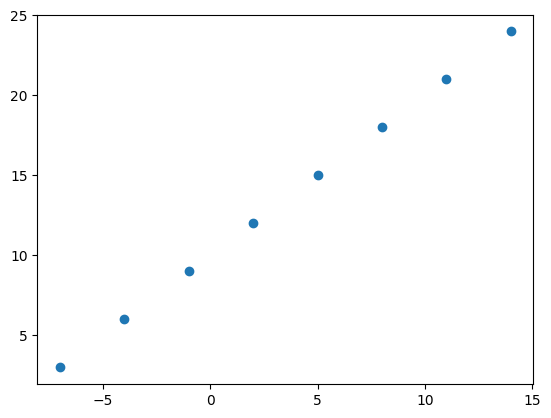

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

<div dir="rtl">

##### قبل أن نقوم بأي عملية نمذجة، هل يمكنك حساب النمط بين "X" و"y"؟

##### على سبيل المثال، لنفترض أنني سألتك، بناءً على هذه البيانات، ما هي قيمة "y" إذا كانت "X" تساوي 17.0؟

##### أو ماذا لو كان "X" هو -10.0؟

##### هذا النوع من اكتشاف الأنماط هو جوهر ما سنقوم ببناء الشبكات العصبية للقيام به من أجلنا. (ص = س + 10) 

<div dir="rtl">

## أشكال إدخال الانحدار وأشكال الإخراج

##### أحد أهم المفاهيم عند العمل مع الشبكات العصبية هي أشكال الإدخال والإخراج.

##### شكل الإدخال هو شكل بياناتك التي تدخل في النموذج. 

##### شكل الإخراج هو شكل بياناتك التي تريد أن تخرج من النموذج الخاص بك.

##### ستختلف هذه وفقًا للمشكلة التي تعمل عليها.

##### تقبل الشبكات العصبية الأرقام وأرقام الإخراج. عادةً ما يتم تمثيل هذه الأرقام كموترات (أو صفائف).

##### من قبل، قمنا بإنشاء البيانات باستخدام مصفوفات NumPy، ولكن يمكننا أن نفعل الشيء نفسه مع الموترات.

In [8]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [9]:
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

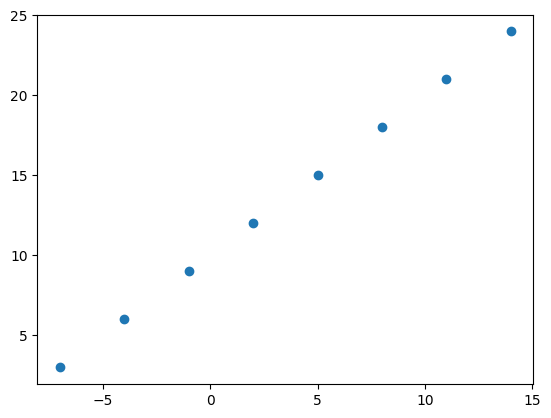

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

سيكون هدفنا هنا هو استخدام `X` للتنبؤ بـ `Y`.

إذن **الإدخال** سيكون `X` و **الإخراج** سيكون `Y`.


<div dir="rtl">

##### في حالتنا، نحاول بناء نموذج للتنبؤ بالنمط بين `X[0]` الذي يساوي `-7.0` و`y[0]` الذي يساوي `3.0`.

##### والآن حصلنا على إجابتنا، ونحاول استخدام قيمة `X` واحدة للتنبؤ بقيمة `y` واحدة.

##### ربما تفكر، "يبدو هذا معقدًا جدًا لمجرد التنبؤ بخط مستقيم...".

##### وستكون على حق.

##### لكن المفاهيم التي نغطيها هنا، مفاهيم أشكال الإدخال والإخراج للنموذج أساسية.

##### في الواقع، من المحتمل أن يكونا من بين الأشياء التي ستقضي معظم وقتك فيهما عند العمل مع الشبكات العصبية: **التأكد من أن المدخلات والمخرجات في الشكل الصحيح**.

##### إذا لم يكن الأمر منطقيًا الآن، فسنرى الكثير من الأمثلة لاحقًا (ستلاحظ قريبًا أن أشكال الإدخال والإخراج يمكن أن تكون تقريبًا أي شيء يمكنك تخيله).

<img src="images/regression.png" alt="a 6 step scikit-learn workflow" />

##### *إذا كنت تعمل على بناء خوارزمية تعلم آلي للتنبؤ بأسعار المساكن، فقد تكون مدخلاتك عدد غرف النوم وعدد الحمامات وعدد الكراجات، مما يمنحك شكل مدخلات 3 (3 ميزات مختلفة). وبما أنك تحاول التنبؤ بسعر المنزل، فإن شكل الناتج سيكون 1.*

<div dir="rtl">
    
## خطوات النمذجة باستخدام TensorFlow

##### الآن بعد أن عرفنا ما هي البيانات التي لدينا بالإضافة إلى أشكال المدخلات والمخرجات، دعونا نرى كيف يمكننا بناء شبكة عصبية لنمذجتها.

##### في TensorFlow، هناك عادةً 3 خطوات أساسية لإنشاء نموذج وتدريبه.

1. **إنشاء نموذج** - قم بتجميع طبقات الشبكة العصبية بنفسك (باستخدام [Functional](https://www.tensorflow.org/guide/keras/functional) أو [Functional](https://www.tensorflow.org/guide/keras/functional)) أو قم باستيراد نموذج تم إنشاؤه مسبقًا (المعروف باسم نقل التعلم).
2. **تجميع نموذج** - تحديد كيفية قياس أداء النموذج (الخسارة/المقاييس) بالإضافة إلى تحديد كيفية تحسينه (المُحسِّن).
3. **ملاءمة النموذج** - السماح للنموذج بمحاولة العثور على أنماط في البيانات (كيف يصل `X` إلى `y`).

##### دعونا نرى هذه الأمور عمليًا باستخدام [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) لبناء نموذج لبيانات الانحدار الخاصة بنا. وبعد ذلك سننتقل إلى كل منها.

##### > **ملاحظة:** إذا كنت تستخدم [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+، فلن تقوم الدالة `fit()` بترقية بيانات الإدخال للانتقال من `(batch_size, )` إلى `(batch_size, 1)`. لإصلاح ذلك، ستحتاج إلى توسيع بُعد بيانات الإدخال باستخدام `tf.expand_dims(input_data, axis=-1)`.
>
##### > في حالتنا، هذا يعني بدلاً من استخدام `model.fit(X, y, epochs=5)`، استخدم `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)` .

In [11]:
model=[]

In [12]:
import random
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 9.1572 - mae: 9.1572
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 9.0247 - mae: 9.0247
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 8.8922 - mae: 8.8922
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 8.7597 - mae: 8.7597
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 8.6272 - mae: 8.6272


لقد قمنا للتو بتدريب نموذج لمعرفة الأنماط بين `X` و`y`.

كيف تعتقد أن الأمر سار؟

In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

ما رأيك في النتيجة التي يجب أن تكون إذا مررنا لنموذجنا قيمة "X" بقيمة 17.0؟

In [14]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 83ms/step


array([[24.118654]], dtype=float32)

<div dir="rtl">

##### لا تسير الأمور على ما يرام... كان من المفترض أن يكون الناتج قريبًا من 27.0.

##### > 🤔 **السؤال:** ما هو الكيراس؟ اعتقدت أننا نعمل مع TensorFlow ولكن في كل مرة نكتب فيها كود TensorFlow، يأتي `keras` بعد `tf` (على سبيل المثال، `tf.keras.layers.Dense()`)؟

##### قبل TensorFlow 2.0+، كانت [Keras](https://keras.io/) عبارة عن واجهة برمجة تطبيقات مصممة لتكون قادرة على بناء نماذج التعلم العميق بسهولة. منذ إصدار TensorFlow 2.0+، تم دمج وظائفه بإحكام داخل مكتبة TensorFlow.

<div dir="rtl">

## تحسين النموذج

##### كيف تعتقد أنك ستحسن نموذجنا الحالي؟

##### إذا خمنت من خلال تعديل بعض الأشياء التي قمنا بها أعلاه، فستكون على صواب.

##### لتحسين نموذجنا، قمنا تقريبًا بتعديل كل جزء من الخطوات الثلاث التي مررنا بها من قبل.

1. **إنشاء نموذج** - قد ترغب هنا في إضافة المزيد من الطبقات، وزيادة عدد الوحدات المخفية (وتسمى أيضًا الخلايا العصبية) داخل كل طبقة، وتغيير وظائف التنشيط لكل طبقة.
2. **تجميع نموذج** - قد ترغب في اختيار وظيفة التحسين أو ربما تغيير **معدل التعلم** لوظيفة التحسين.
3. **ملاءمة النموذج** - ربما يمكنك ملاءمة النموذج لمزيد من **العصور** (اتركه للتدريب لفترة أطول) أو لمزيد من البيانات (أعط النموذج المزيد من الأمثلة للتعلم منها).

<img src="images/improve_model.png" alt="a 6 step scikit-learn workflow" />

* هناك العديد من الطرق المختلفة لتحسين الشبكة العصبية. تتضمن بعض الطرق الأكثر شيوعًا: زيادة عدد الطبقات (جعل الشبكة أعمق)، وزيادة عدد الوحدات المخفية (جعل الشبكة أوسع)، وتغيير معدل التعلم. نظرًا لأن هذه القيم كلها قابلة للتغيير بواسطة الإنسان، تتم الإشارة إليها باسم [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) ويشار إلى ممارسة محاولة العثور على أفضل المعلمات الفائقة باسم [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning).*

##### واو. لقد قدمنا ​​للتو مجموعة من الخطوات الممكنة. الشيء المهم الذي يجب أن تتذكره هو أن كيفية تغيير كل من هذه الأمور ستعتمد على المشكلة التي تعمل عليها.

##### والشيء الجيد هو أنه خلال المشاكل القليلة القادمة، سنعمل على حلها جميعًا.

##### في الوقت الحالي، دعونا نجعل الأمر بسيطًا، كل ما سنفعله هو تدريب نموذجنا لفترة أطول (سيبقى كل شيء آخر كما هو). 

In [15]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 184ms/step - loss: 9.1572 - mae: 9.1572
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 9.0247 - mae: 9.0247
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 8.8922 - mae: 8.8922
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7597 - mae: 8.7597
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 8.6272 - mae: 8.6272
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 8.4947 - mae: 8.4947
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 8.3622 - mae: 8.3622
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 8.2297 - mae: 8.2297
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 8.0972 - mae: 8.0972
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 7.9647 - mae: 7.9647
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 7.832

<div dir="rtl">
    
##### ربما لاحظت انخفاض قيمة الخسارة من قبل (ويستمر في الانخفاض مع ارتفاع عدد العصور).

##### ماذا يعني هذا في رأيك عندما نقوم بالتنبؤ باستخدام نموذجنا؟ 

##### ماذا عن محاولة التنبؤ بالإصدار 17.0 مرة أخرى؟

In [16]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 66ms/step


array([[30.208649]], dtype=float32)

<div dir="rtl">

##### لقد اقتربنا هذه المرة. ولكن لا يزال بإمكاننا أن نكون أفضل.

##### الآن قمنا بتدريب نموذج، كيف يمكننا تقييمه؟

<div dir="rtl">

## تقييم النموذج

##### سير العمل النموذجي الذي ستتبعه عند بناء الشبكات العصبية هو:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

##### ربما يأتي التغيير والتبديل من عدم بناء نموذج من الصفر ولكن من تعديل نموذج موجود.

### تصور، تصور، تصور

##### عندما يتعلق الأمر بالتقييم، عليك أن تتذكر الكلمات: "تصور، تصور، تصور".

##### هذا لأنك ربما تنظر إلى شيء ما (تفعله) بشكل أفضل من التفكير في شيء ما.

##### إنها فكرة جيدة أن تتصور:
* **البيانات** - ما هي البيانات التي تستخدمها؟ كيف تبدو؟
* **النموذج نفسه** - كيف يبدو التصميم المعماري؟ ما هي الأشكال المختلفة؟
* **تدريب النموذج** - كيف يعمل النموذج أثناء التعلم؟
* **تنبؤات النموذج** - كيف تتوافق تنبؤات النموذج مع الحقيقة الأرضية (المسميات الأصلية)؟

##### لنبدأ بتصور النموذج.

##### لكن أولاً، سنقوم بإنشاء مجموعة بيانات أكبر قليلاً ونموذج جديد يمكننا استخدامه (سيكون هو نفسه كما كان من قبل، ولكن كلما زاد التدريب كلما كان ذلك أفضل).

In [18]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [19]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

بما أن $y=X+10$، يمكننا أن نجعل التصنيفات كالتالي:

In [20]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

<div dir="rtl">

## تقسيم البيانات إلى مجموعة تدريب/اختبار

##### إحدى الخطوات الأخرى الأكثر شيوعًا والأكثر أهمية في مشروع التعلم الآلي هي إنشاء مجموعة تدريب واختبار (ومجموعة التحقق عند الحاجة).

##### كل مجموعة تخدم غرضًا محددًا:
* **مجموعة التدريب** - يتعلم النموذج من هذه البيانات، والتي تمثل عادةً 70-80% من إجمالي البيانات المتاحة (مثل مواد الدورة التدريبية التي تدرسها خلال الفصل الدراسي).
* **مجموعة التحقق** - يتم ضبط النموذج على هذه البيانات، والتي تمثل عادةً 10-15% من إجمالي البيانات المتاحة (مثل الاختبار التدريبي الذي تجريه قبل الاختبار النهائي).
* **مجموعة الاختبار** - يتم تقييم النموذج بناءً على هذه البيانات لاختبار ما تعلمه، وعادةً ما يكون ذلك بنسبة 10-15% من إجمالي البيانات المتاحة (مثل الاختبار النهائي الذي تجريه في نهاية الفصل الدراسي).

##### في الوقت الحالي، سنستخدم فقط مجموعة التدريب والاختبار، وهذا يعني أنه سيكون لدينا مجموعة بيانات لنموذجنا لنتعلمها ونقيم عليها.

##### يمكننا إنشاؤها عن طريق تقسيم المصفوفتين "X" و"y".

##### > 🔑 **ملاحظة:** عند التعامل مع بيانات العالم الحقيقي، يتم عادةً تنفيذ هذه الخطوة مباشرةً في بداية المشروع (يجب أن تظل مجموعة الاختبار منفصلة دائمًا عن جميع البيانات الأخرى). نريد أن يتعلم نموذجنا بيانات التدريب ثم يقيمها على بيانات الاختبار للحصول على إشارة إلى مدى جودة **تعميمها** على الأمثلة غير المرئية.

In [21]:
# Check how many samples we have
len(X)

50

In [22]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

<div dir="rtl">

## تصور البيانات

##### الآن حصلنا على بيانات التدريب والاختبار، ومن الجيد أن نتصورها.

##### دعونا نرسمها ببعض الألوان الجميلة للتمييز بين ما هو وما هو.

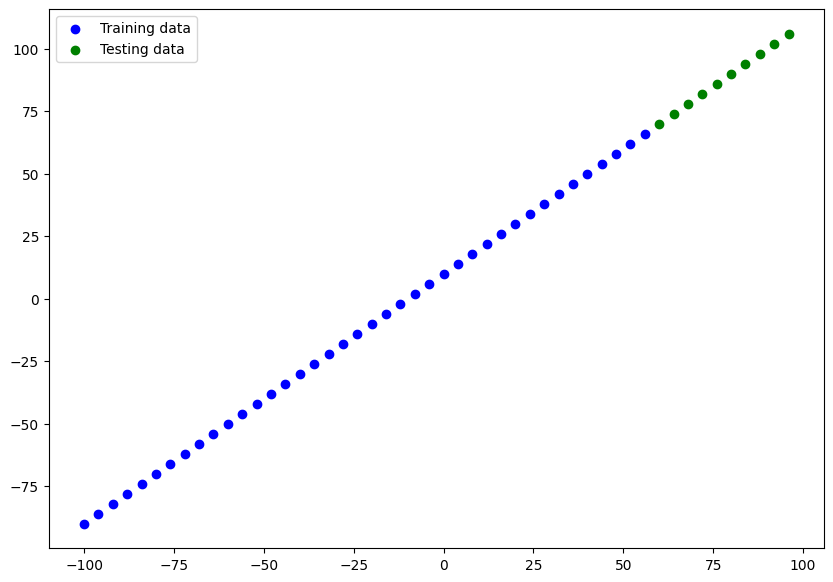

In [23]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

<div dir="rtl">

##### جميل! في أي وقت يمكنك فيه تصور بياناتك، أو نموذجك، أو أي شيء لديك، فهي فكرة جيدة.

##### مع وضع هذا الرسم البياني في الاعتبار، ما سنحاول القيام به هو بناء نموذج يتعلم النمط الموجود في النقاط الزرقاء (`X_train`) لرسم النقاط الخضراء (`X_test`).

##### الوقت لبناء نموذج. سنصنع نفس الشيء من قبل (الذي تدربنا عليه لفترة أطول).

<div dir="rtl">

##### يمكننا السماح لنموذجنا بمعرفة شكل الإدخال لبياناتنا باستخدام المعلمة "input_shape" للطبقة الأولى (عادةً، إذا لم يتم تعريف "input_shape"، يحاول Keras اكتشافه تلقائيًا).

In [24]:
model=[]

In [25]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                  #input_shape=[1]
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100) 

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 29.2091 - mae: 29.2091
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2488 - mae: 9.2488
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 7.7989 - mae: 7.7989
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 8.7788 - mae: 8.7788
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.7367 - mae: 10.7367
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.9297 - mae: 9.9297
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 8.9868 - mae: 8.9868
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.0719 - mae: 9.0719
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 19.8086 - mae: 19.8086
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.6967 - mae: 10.6967
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss:

## تصور النموذج

بعد أن تقوم ببناء نموذج، قد ترغب في إلقاء نظرة عليه (خاصة إذا لم تكن قد قمت ببناء العديد من النماذج من قبل).

يمكنك إلقاء نظرة على طبقات وأشكال النموذج الخاص بك عن طريق استدعاء [`summary()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary) عليه.

> 🔑 **ملاحظة:** يعد تصور النموذج مفيدًا بشكل خاص عند مواجهة عدم تطابق أشكال الإدخال والإخراج.

In [26]:
# Doesn't work (model not fit/built)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


<div dir="rtl">

##### استدعاء ``summary()`' على نموذجنا يوضح لنا الطبقات التي يحتوي عليها، وشكل الإخراج وعدد المعلمات.
* **إجمالي المعلمات** - إجمالي عدد المعلمات في النموذج.
* **المعلمات القابلة للتدريب** - هذه هي المعلمات (الأنماط) التي يمكن للنموذج تحديثها أثناء تدريبه.
* **المعلمات غير القابلة للتدريب** - لا يتم تحديث هذه المعلمات أثناء التدريب (وهذا أمر طبيعي عند إحضار الأنماط التي تعلمتها بالفعل من نماذج أخرى أثناء نقل التعلم).

##### > 📖 **الموارد:** للحصول على نظرة عامة أكثر تعمقًا حول المعلمات القابلة للتدريب داخل الطبقة، راجع [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

##### > 🛠 **التمرين:** حاول التلاعب بعدد الوحدات المخفية في الطبقة `كثيفة` (على سبيل المثال، `كثيفة(2)`، `كثيفة(3)`). كيف يغير هذا المعلمات الإجمالي/القابل للتدريب؟ التحقيق في سبب التغيير.

<img src="images/neural_network.jpg" alt="a 6 step scikit-learn workflow" width="700"/>

##### في الوقت الحالي، كل ما تحتاج إلى التفكير فيه بشأن هذه المعلمات هو أنماطها القابلة للتعلم في البيانات.

<div dir="rtl">

##### في حالتنا، النموذج الذي استخدمناه يحتوي فقط على مدخلات ومخرجات ولكن تصور نماذج أكثر تعقيدًا يمكن أن يكون مفيدًا جدًا لتصحيح الأخطاء.

<div dir="rtl">

## تصور التوقعات

##### الآن لدينا نموذج مدرب، دعونا نتصور بعض التوقعات.

##### لتصور التنبؤات، من الجيد دائمًا وضعها في مقابل علامات الحقيقة الأرضية.

##### غالبًا ما ترى ذلك في شكل `y_test` مقابل `y_pred` (الحقيقة الأساسية مقابل التوقعات).

##### أولاً، سنقوم ببعض التنبؤات على بيانات الاختبار (`X_test`)، تذكر أن النموذج لم يشاهد بيانات الاختبار مطلقًا.

In [27]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 45ms/step


In [28]:
# View the predictions
y_preds

array([[44.42944 ],
       [47.303818],
       [50.178196],
       [53.052574],
       [55.926956],
       [58.801334],
       [61.675713],
       [64.550095],
       [67.42447 ],
       [70.29885 ]], dtype=float32)

<div dir="rtl">
    
##### حسنًا، حصلنا على قائمة بالأرقام، لكن كيف يمكن مقارنتها بمسميات الحقيقة الأرضية؟

##### دعونا نبني وظيفة التخطيط لمعرفة ذلك.

##### > 🔑 **ملاحظة:** إذا كنت تعتقد أنك ستتخيل شيئًا ما كثيرًا، فمن الجيد أن تقوم بوظيفته حتى تتمكن من استخدامه لاحقًا.

In [29]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

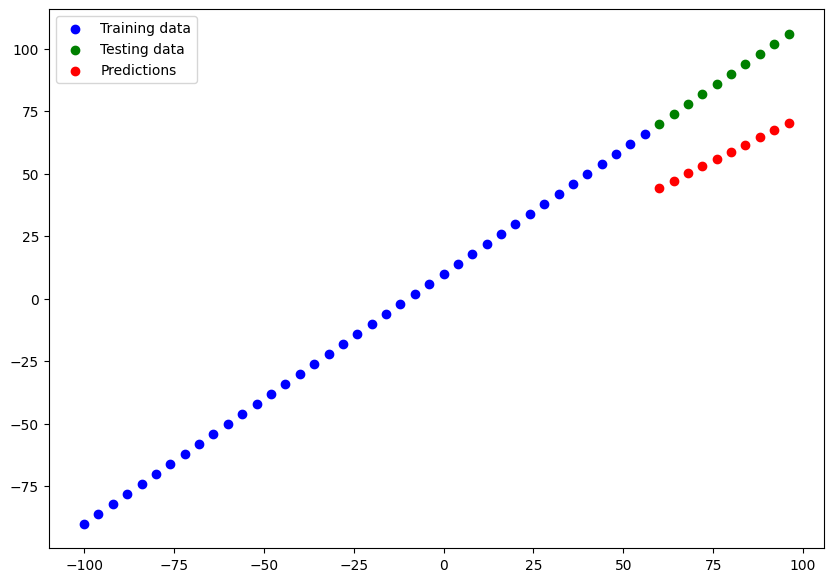

In [30]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

<div dir="rtl">

##### من الحبكة يمكننا أن نرى أن توقعاتنا ليست غريبة تمامًا ولكنها بالتأكيد ليست شيئًا خاصًا أيضًا.

<div dir="rtl">

## تقييم التوقعات

##### إلى جانب المرئيات، تعد مقاييس التقييم خيارك البديل الأفضل لتقييم نموذجك.

##### اعتمادًا على المشكلة التي تعمل عليها، يكون للنماذج المختلفة مقاييس تقييم مختلفة.

##### اثنان من المقاييس الرئيسية المستخدمة لمشاكل الانحدار هما:
* **متوسط ​​الخطأ المطلق (MAE)** - متوسط ​​الفرق بين كل من التنبؤات.
* **متوسط ​​الخطأ التربيعي (MSE)** - متوسط ​​الفرق المربع بين التوقعات (يُستخدم إذا كانت الأخطاء الأكبر أكثر ضررًا من الأخطاء الأصغر).

##### وكلما انخفضت كل من هذه القيم، كلما كان ذلك أفضل.

##### يمكنك أيضًا استخدام [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) الذي سيعيد فقدان النموذج بالإضافة إلى أي إعداد للمقاييس أثناء خطوة الترجمة.

In [31]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 101ms/step - loss: 30.6359 - mae: 30.6359


[30.635854721069336, 30.635854721069336]

<div dir="rtl">

##### في حالتنا، نظرًا لأننا استخدمنا MAE لدالة الخسارة وكذلك MADE للمقاييس، فإن `model.evaluate()` يُرجعهما معًا.

##### يحتوي TensorFlow أيضًا على وظائف مدمجة لـ MSE وMAE.

##### بالنسبة للعديد من وظائف التقييم، فإن الفرضية هي نفسها: مقارنة التنبؤات بمسميات الحقيقة الأساسية.

<div dir="rtl">

##### حسنًا، نحن نعرف الآن كيفية جعل مدة `y_test` و`y_pred` بنفس الشكل، فلنستخدم مقاييس التقييم الخاصة بنا.

In [32]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.635855>

In [33]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=949.0086>

<div dir="rtl">

##### يمكننا أيضًا حساب MAE باستخدام وظائف TensorFlow النقية.

In [34]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=30.63585548400879>

<div dir="rtl">

##### مرة أخرى، إنها فكرة جيدة أن تقوم بتفعيل أي شيء تعتقد أنك قد تستخدمه مرارًا وتكرارًا (أو تجد نفسك تستخدمه مرارًا وتكرارًا).

##### دعونا نجعل وظائف لمقاييس التقييم لدينا.

In [35]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

<div dir="rtl">

## إجراء التجارب لتحسين النموذج

##### بعد رؤية مقاييس التقييم والتنبؤات التي يقدمها نموذجك، فمن المحتمل أنك سوف ترغب في تحسينه.

##### مرة أخرى، هناك العديد من الطرق المختلفة التي يمكنك من خلالها القيام بذلك، ولكن ثلاثة من الطرق الرئيسية هي:
1. **احصل على المزيد من البيانات** - احصل على المزيد من الأمثلة لنموذجك للتدريب عليها (المزيد من الفرص لتعلم الأنماط).
2. **اجعل نموذجك أكبر (استخدم نموذجًا أكثر تعقيدًا)** - قد يأتي ذلك في شكل المزيد من الطبقات أو المزيد من الوحدات المخفية في كل طبقة.
3. **التدريب لفترة أطول** - امنح نموذجك فرصة أكبر للعثور على الأنماط في البيانات.

##### منذ أن أنشأنا مجموعة البيانات الخاصة بنا، يمكننا بسهولة إنشاء المزيد من البيانات، لكن هذا ليس هو الحال دائمًا عند العمل مع مجموعات بيانات حقيقية.

##### لذلك دعونا نلقي نظرة على كيف يمكننا تحسين نموذجنا باستخدام 2 و 3.

##### للقيام بذلك، سنقوم ببناء 4 نماذج ومقارنة نتائجها:
1. `model_1` - نفس النموذج الأصلي، طبقة واحدة، تم تدريبه لمدة 100 عصر.
2. `model_2` - طبقتان، تم تدريبهما لمدة 100 عصر.
3. `model_3` - طبقتان، تم تدريبهما لمدة 500 عصر.
4. `model_4` - 3 طبقات، المزيد من الشبكات العصبية، تم تدريبها لمدة 100 عصر.
 
##### ** بناء `model_1`**

In [36]:
model_1=[]

In [37]:
# Set random seed
tf.random.set_seed(42)
np.random.seed(42)


# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 13.0302 - mae: 13.0302
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 12.8085 - mae: 12.8085
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 11.4263 - mae: 11.4263
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.4732 - mae: 9.4732
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.3696 - mae: 10.3696
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.6070 - mae: 9.6070
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 8.7172 - mae: 8.7172
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.0507 - mae: 9.0507
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 19.1309 - mae: 19.1309
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.3208 - mae: 10.3208
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 278ms/step


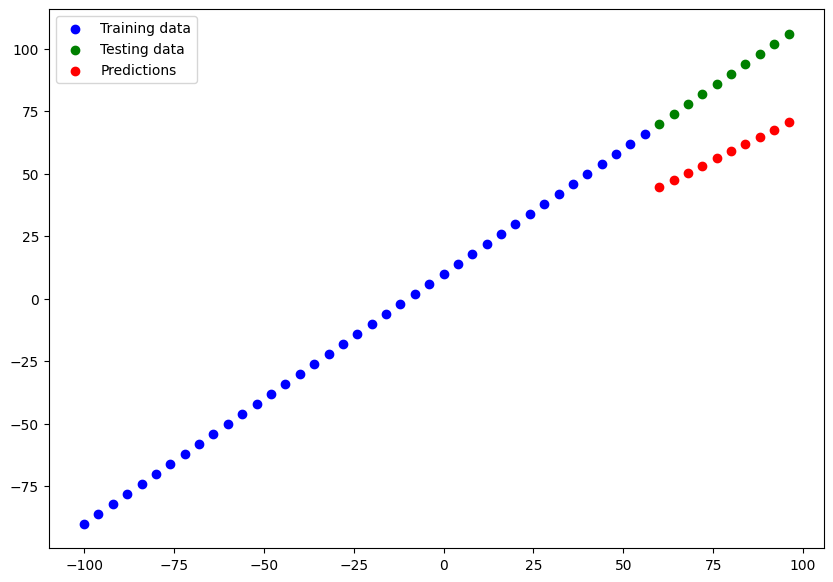

In [38]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [39]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(30.404795, 934.69617)

<div dir="rtl">

##### ** بناء `model_2`**

##### سنضيف هذه المرة طبقة كثيفة إضافية (لذلك سيحتوي نموذجنا الآن على طبقتين) مع الحفاظ على كل شيء آخر كما هو.

In [40]:
model_2=[]

In [41]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 49ms/step


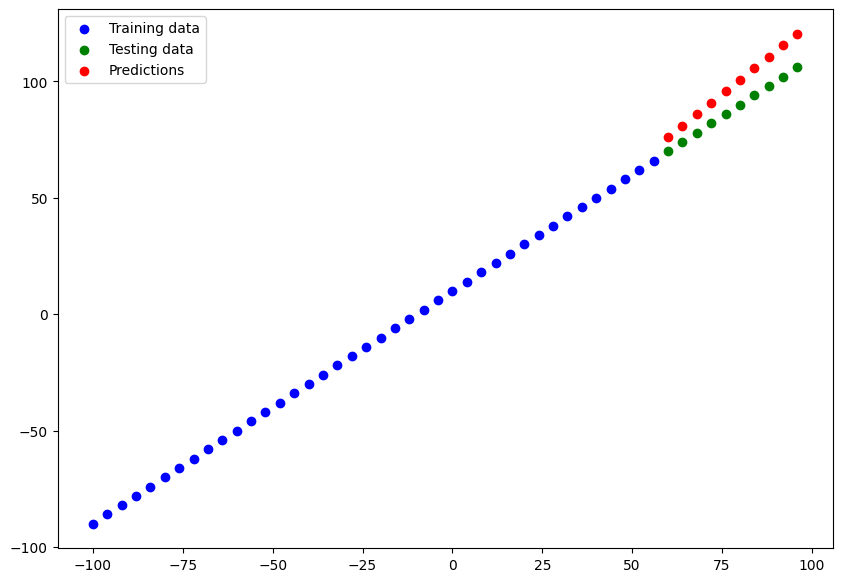

In [42]:
# Make and plot predictions for model_2
# Set random seed
tf.random.set_seed(42)
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

واو، هذا يبدو أفضل بالفعل! وكل ما يتطلبه الأمر هو طبقة إضافية.

In [43]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(10.227263, 111.97353)

<div dir="rtl">

##### ** بناء `model_3`**

##### بالنسبة لنموذجنا الثالث، سنحتفظ بكل شيء كما هو `model_2` باستثناء أننا سنتدرب هذه المرة لفترة أطول (500 حقبة بدلاً من 100).

##### وهذا سيعطي نموذجنا فرصة أكبر لتعلم الأنماط الموجودة في البيانات.

In [44]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 48ms/step


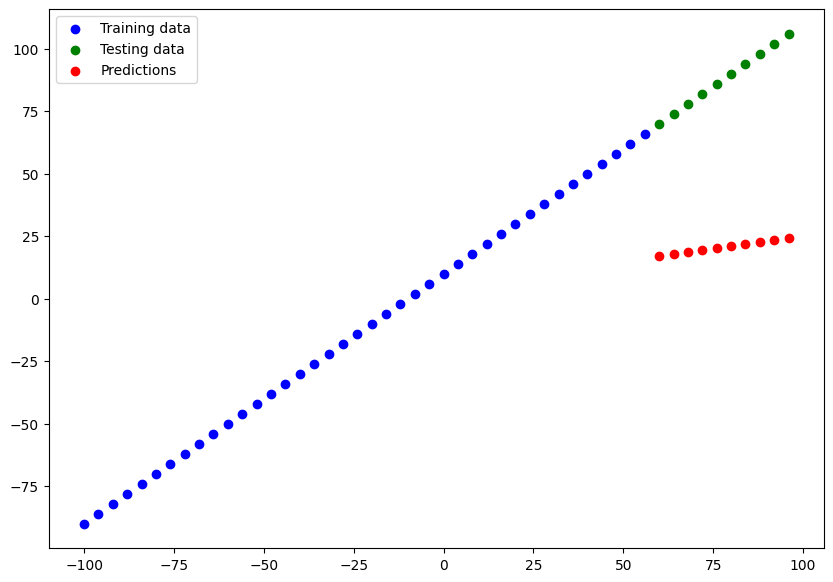

In [45]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

<div dir="rtl">

##### غريب، لقد تدربنا لفترة أطول ولكن أداء نموذجنا كان أسوأ؟

##### كما اتضح، ربما يكون نموذجنا قد تدرب لفترة طويلة جدًا مما أدى إلى نتائج أسوأ (سنرى طرقًا لمنع التدريب لفترة طويلة جدًا لاحقًا).

In [46]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.40959, 4627.6235)

<div dir="rtl">

##### ** بناء `model_4`**


In [53]:
model_4=[]

In [56]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Replicate model_1 and add an extra layer
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 55ms/step


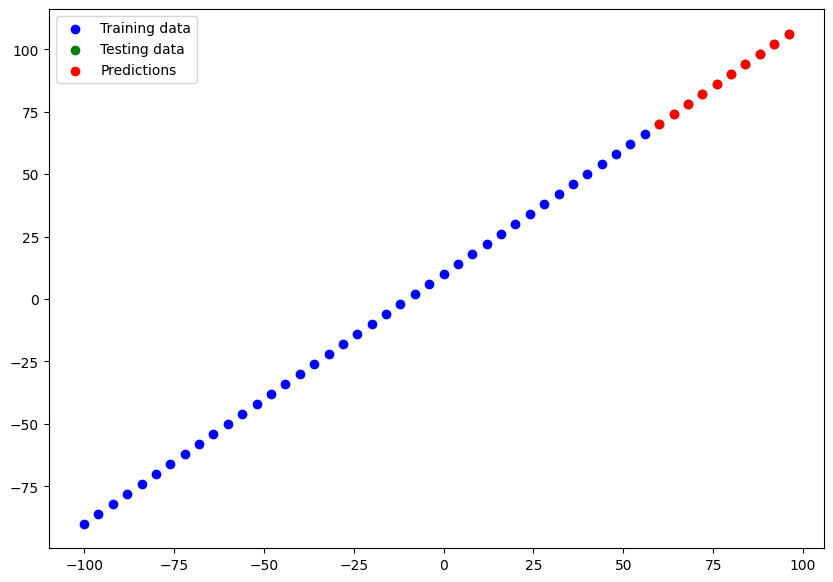

In [57]:
# Make and plot predictions for model_3
y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions=y_preds_4)

In [58]:
# Calculate model_3 metrics
mae_4 = mae(y_test, y_preds_4.squeeze()).numpy()
mse_4 = mse(y_test, y_preds_4.squeeze()).numpy()
mae_4, mse_4

(0.23687974, 0.05616029)

<div dir="rtl">

## مقارنة النتائج

##### الآن لدينا نتائج لثلاث نتائج متشابهة ولكن مختلفة قليلاً، فلنقارنها.

In [59]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3],
                ["model_4", mae_4, mse_4]]

In [60]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.404795,934.696167
1,model_2,10.227263,111.973534
2,model_3,67.409592,67.409592
3,model_4,0.236880,0.236880


<div dir="rtl">

##### من خلال تجاربنا، يبدو أن `model_4` حقق أفضل أداء.

##### والآن، ربما تفكر، "رائع، مقارنة النماذج أمر ممل..." ومن المؤكد أنه يمكن أن يكون كذلك، لقد قمنا فقط بمقارنة 4 نماذج هنا.

##### ولكن هذا جزء من موضوع نمذجة التعلم الآلي، وهو تجربة العديد من المجموعات المختلفة من النماذج ومعرفة أي منها يحقق أفضل أداء.

##### كل نموذج تقوم بإنشائه هو تجربة صغيرة.

##### > 🔑 **ملاحظة:** يجب أن يكون أحد أهدافك الرئيسية هو تقليل الوقت بين تجاربك. كلما قمت بتجارب أكثر، كلما اكتشفت المزيد من الأشياء التي لا تعمل، وبالتالي تقترب من اكتشاف ما ينجح. تذكر شعار ممارس التعلم الآلي: "التجربة، التجربة، التجربة".

##### شيء آخر ستجده أيضًا هو أن ما كنت تعتقد أنه قد ينجح (مثل تدريب نموذج لفترة أطول) قد لا ينجح دائمًا والعكس تمامًا هو الحال أيضًا في كثير من الأحيان.

## تتبع تجاربك

##### إحدى العادات الجيدة حقًا التي يجب عليك اتباعها هي تتبع تجارب النمذجة الخاصة بك لمعرفة أي منها يحقق أداءً أفضل من الآخرين.

##### لقد قمنا بنسخة بسيطة من هذا أعلاه (الاحتفاظ بالنتائج في متغيرات مختلفة).

##### > 📖 **الموارد:** ولكن أثناء إنشاء المزيد من النماذج، ستحتاج إلى التفكير في استخدام أدوات مثل:
* [**TensorBoard**](https://www.tensorflow.org/tensorboard/) - أحد مكونات مكتبة TensorFlow للمساعدة في تتبع تجارب النمذجة (سنرى ذلك لاحقًا).
* [**Weights & Biases**](https://www.wandb.com/) - أداة لتتبع جميع أنواع تجارب التعلم الآلي (الخبر السار بالنسبة إلى الأوزان والتحيزات هو أنه يتم توصيلها بـ TensorBoard).

<div dir="rtl">
    
## حفظ النموذج

##### بمجرد قيامك بتدريب النموذج والعثور على النموذج الذي يرضيك، فربما تريد حفظه لاستخدامه في مكان آخر (مثل تطبيق ويب أو جهاز محمول).

##### يمكنك حفظ نموذج TensorFlow/Keras باستخدام [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

##### هناك طريقتان لحفظ النموذج في TensorFlow:
1. [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (افتراضي).
2. ملف [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

##### والفرق الرئيسي بين الاثنين هو أن SavedModel قادر تلقائيًا على حفظ الكائنات المخصصة (مثل الطبقات الخاصة) دون تعديلات إضافية عند تحميل النموذج مرة أخرى.

##### التي ينبغي لأحد أن تستخدمها؟

##### يعتمد ذلك على حالتك ولكن تنسيق SavedModel سيكون كافيًا في معظم الأوقات.

##### تستخدم كلتا الطريقتين نفس استدعاء الأسلوب.

In [53]:
# Save a model using the SavedModel format
model_4.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [54]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	keras_metadata.pb  saved_model.pb  variables


الآن دعونا نحفظ النموذج بتنسيق HDF5، وسنستخدم نفس الطريقة ولكن باسم ملف مختلف.

In [55]:
# Save a model using the HDF5 format
model_4.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [56]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


<div dir="rtl">

## تحميل النموذج

##### يمكننا تحميل نموذج محفوظ باستخدام طريقة [`load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model).

##### تحميل نموذج للتنسيقات المختلفة (SavedModel وHDF5) هو نفسه (طالما أن أسماء المسارات للتنسيقات المحددة صحيحة).

In [57]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 200)               400       
                                                                 
 dense_9 (Dense)             (None, 200)               40200     
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 60,801
Trainable params: 60,801
Non-trainable params: 0
_________________________________________________________________


الآن دعونا نختبر ذلك.

In [58]:
# Compare model_2 with the SavedModel version (should return True)
model_4_preds = model_4.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_4_preds.squeeze()).numpy()

1/1 [==============================] - 0s 214ms/step


True

<div dir="rtl">

 التحميل من HDF5 هو نفسه إلى حد كبير.

In [59]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 200)               400       
                                                                 
 dense_9 (Dense)             (None, 200)               40200     
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 60,801
Trainable params: 60,801
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_4_preds.squeeze()).numpy()

1/1 [==============================] - 0s 54ms/step


True

<div dir="rtl">

## مثال أكبر

##### حسنًا، لقد رأينا أساسيات بناء نماذج انحدار الشبكة العصبية في TensorFlow.

##### دعونا نصعد الأمر قليلاً ونبني نموذجًا لمجموعة بيانات أكثر ثراءً بالميزات.

##### وبشكل أكثر تحديدًا، سنحاول التنبؤ بتكلفة التأمين الطبي للأفراد استنادًا إلى عدد من العوامل المختلفة مثل "العمر" و"الجنس" و"مؤشر كتلة الجسم" و"الأطفال" و"حالة التدخين" و"منطقة_الإقامة".

##### للقيام بذلك، سنستفيد من [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) المتاح للعامة والمتاح من Kaggle و[Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance).

##### > 🔑 **ملاحظة:** عند تعلم نماذج التعلم الآلي، ستخضع غالبًا لسلسلة من التقنيات الأساسية ثم تمارسها من خلال العمل باستخدام مجموعات البيانات والأمثلة مفتوحة المصدر. تمامًا كما نفعل الآن، تعلم الأساسيات، واستخدمها للتعامل مع المشكلات المختلفة. في كل مرة تعمل فيها على شيء جديد، من الجيد البحث عن شيء مثل "مثال لمشكلة X مع Python/TensorFlow" حيث تستبدل X بمشكلتك.

In [61]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [62]:
# Read in the insurance dataset
#insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance = pd.read_csv('data/insurance.csv')

In [63]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<div dir="rtl">

##### سيتعين علينا تحويل الأعمدة غير الرقمية إلى أرقام (لأن الشبكة العصبية لا يمكنها التعامل مع المدخلات غير الرقمية).

##### للقيام بذلك، سنستخدم الطريقة [`get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) في الباندا.

##### يقوم بتحويل المتغيرات الفئوية (مثل أعمدة "الجنس" و"المدخن" و"المنطقة") إلى متغيرات رقمية باستخدام ترميز واحد ساخن.

In [64]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


<div dir="rtl">

سنقوم الآن بتقسيم البيانات إلى ميزات (`X`) وتسميات (`y`).

In [65]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [66]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


<div dir="rtl">

وإنشاء مجموعات التدريب والاختبار. يمكننا القيام بذلك يدويًا، ولكن لتسهيل الأمر، سنستفيد من وظيفة [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) المتوفرة بالفعل والمتاحة من Scikit-Learn.

In [67]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [68]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

<div dir="rtl">

الآن يمكننا بناء نموذج وملاءمته (سنجعله مثل `model_2`).

In [69]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1,0,1,0,1,0,0,0
887,36,30.020,0,1,0,1,0,0,1,0,0
890,64,26.885,0,1,0,0,1,0,1,0,0
1293,46,25.745,3,0,1,1,0,0,1,0,0
259,19,31.920,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109,63,35.090,0,0,1,0,1,0,0,1,0
575,58,27.170,0,1,0,1,0,0,1,0,0
535,38,28.025,1,0,1,1,0,1,0,0,0
543,54,47.410,0,1,0,0,1,0,0,1,0


In [70]:
#X_train = np.array(X_train)
#y_train = np.array(y_train)
# Cast X_train and y_train to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [71]:
insurance_model=[]

In [72]:
import random
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)
               
# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8507.4648 - mae: 8507.4648
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7824.0142 - mae: 7824.0142
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7615.8936 - mae: 7615.8936
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7667.1729 - mae: 7667.1729
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7674.4395 - mae: 7674.4395
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7577.3838 - mae: 7577.3838
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7528.8286 - mae: 7528.8286
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7799.8369 - mae: 7799.8369
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7571.8398 - mae: 7571.8398
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7723.0757 - mae: 7723.0757

In [73]:
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 966us/step - loss: 7031.0513 - mae: 7031.0513


[7031.05126953125, 7031.05126953125]

<div dir="rtl">

##### لم يكن أداء نموذجنا جيدًا جدًا، فلنجرب نموذجًا أكبر.

##### سنحاول 3 أشياء:
- زيادة عدد الطبقات (2 -> 3).
- زيادة عدد الوحدات في كل طبقة (ما عدا طبقة الإخراج).
- تغيير المحسن (من SGD إلى آدم).

##### كل شيء آخر سوف تبقى نفسها.

In [74]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [75]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4855.2100 - mae: 4855.2100


[4855.2099609375, 4855.2099609375]

<div dir="rtl">


##### أفضل بكثير! يؤدي استخدام نموذج أكبر ومحسن Adam إلى حدوث نصف الخطأ تقريبًا مثل النموذج السابق.

##### > 🔑 **ملاحظة:** بالنسبة للعديد من المشكلات، يعد [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) خيارًا رائعًا للبدء. راجع نقطة Andrei Karpathy "آدم آمن" من [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) للمزيد.

##### دعونا نتحقق من منحنيات الخسارة في نموذجنا، يجب أن نرى اتجاهًا هبوطيًا.

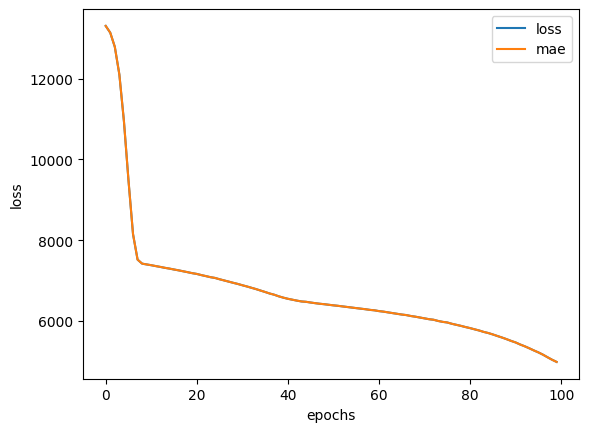

In [76]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [77]:
# plt.figure(figsize=(12, 5))

# # Plotting Mean Absolute Error
# plt.subplot(1, 2, 1)
# plt.plot(history.history['mae'], label='Train MAE')
# plt.title('Mean Absolute Error over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('MAE')
# plt.legend()

# # Plotting Loss
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.title('Loss over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

<div dir="rtl">

##### من هذا، يبدو أن خسارة نموذجنا (و MAE) لا تزال تتناقص (في حالتنا، MAE والخسارة متماثلتان، وبالتالي تتداخل الخطوط الموجودة في المخطط مع بعضها البعض).

##### ما يخبرنا به هذا هو أن الخسارة قد تنخفض إذا حاولنا تدريبها لفترة أطول.

##### > 🤔 **السؤال:** ما هي المدة التي يجب أن تتدرب فيها؟

##### > يعتمد ذلك على المشكلة التي تعمل عليها. في بعض الأحيان، لن يستغرق التدريب وقتًا طويلاً، وفي أحيان أخرى قد يستغرق وقتًا أطول مما تتوقع. إحدى الطرق الشائعة هي ضبط تدريب النموذج الخاص بك لفترة طويلة جدًا (على سبيل المثال، آلاف العصور) ولكن إعداده باستخدام [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) بحيث يتوقف تلقائيًا عندما يتوقف عن التحسن. سنرى هذا في وحدة أخرى.

##### دعونا ندرب نفس النموذج المذكور أعلاه لفترة أطول قليلاً. يمكننا أن نفعل هذا ولكن نطالب به مرة أخرى.

In [78]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

كيف سار التدريب الإضافي؟

In [79]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 1ms/step - loss: 3496.3350 - mae: 3496.3350


(3496.3349609375, 3496.3349609375)

<div dir="rtl">

التدريب لمدة 100 حقبة إضافية نرى انخفاضًا في الخطأ بنسبة 10٪.


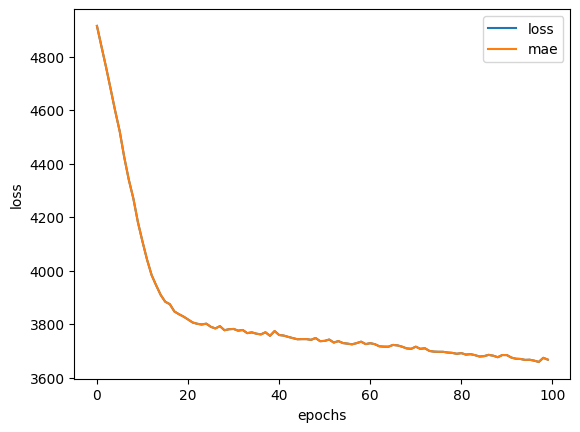

In [80]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

<div dir="rtl">

## بيانات المعالجة المسبقة (التطبيع والتوحيد)

##### من الممارسات الشائعة عند العمل مع الشبكات العصبية التأكد من أن جميع البيانات التي تمررها إليها تقع في النطاق من 0 إلى 1.

##### تُسمى هذه الممارسة **التطبيع** (تحجيم جميع القيم من نطاقها الأصلي إلى، على سبيل المثال، بين 0 و100000 لتصبح بين 0 و1).

##### هناك استدعاء عملية آخر **التوحيد القياسي** والذي يحول جميع بياناتك إلى تباين الوحدة ومتوسط ​​0.

##### غالبًا ما تكون هاتان الممارستان جزءًا من خط أنابيب المعالجة المسبقة (سلسلة من الوظائف لإعداد بياناتك للاستخدام مع الشبكات العصبية).

##### بمعرفة ذلك، تتضمن بعض الخطوات الرئيسية التي ستتخذها لمعالجة بياناتك مسبقًا للشبكة العصبية ما يلي:
* تحويل جميع بياناتك إلى أرقام (لا تستطيع الشبكة العصبية التعامل مع السلاسل).
* التأكد من أن بياناتك بالشكل الصحيح (التحقق من أشكال الإدخال والإخراج).
*[**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
* تطبيع البيانات (التأكد من أن جميع القيم بين 0 و 1). ويتم ذلك عن طريق طرح القيمة الدنيا ثم القسمة على القيمة القصوى مطروحًا منها الحد الأدنى. ويشار إلى هذا أيضًا باسم تحجيم الحد الأدنى والحد الأقصى.
* التقييس (التأكد من أن جميع القيم لها متوسط ​​0 وتباين 1). ويتم ذلك عن طريق طرح القيمة المتوسطة من الميزة المستهدفة ثم قسمتها على الانحراف المعياري.
* التي ينبغي لأحد أن تستخدمها؟
* **مع الشبكات العصبية، ستميل إلى تفضيل التطبيع** لأنها تميل إلى تفضيل القيم بين 0 و1 (سترى هذا خاصة مع معالجة الصور)، ومع ذلك، ستجد غالبًا أن الشبكة العصبية يمكن أن تؤدي أداءً جيدًا جيدًا مع الحد الأدنى من تحجيم الميزات.

##### > 📖 **الموارد:** لمزيد من المعلومات حول المعالجة المسبقة للبيانات، أنصح بقراءة الموارد التالية:
##### *[Scikit-Learn's documentation on preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data).
##### *[Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).

##### لقد قمنا بالفعل بتحويل بياناتنا إلى أرقام باستخدام `get_dummies()`، فلنرى كيف يمكننا تطبيعها أيضًا.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
#insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance = pd.read_csv('data/insurance.csv')

In [82]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<div dir="rtl">

##### الآن، كما كان من قبل، نحن بحاجة إلى تحويل الأعمدة غير الرقمية إلى أرقام وهذه المرة سنقوم أيضًا بتسوية الأعمدة الرقمية بنطاقات مختلفة (للتأكد من أنها كلها بين 0 و 1).

##### للقيام بذلك، سنستخدم بعض الفصول من Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - إنشاء وظيفة معالجة مسبقة للبيانات متعددة الخطوات للتحويلات التالية:
* [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - تأكد من تسوية جميع الأعمدة الرقمية (بين 0 و1).
* [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - تشفير سريع للأعمدة غير الرقمية.

##### دعونا نراهم في العمل.

In [83]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

<div dir="rtl">

لقد قمنا الآن بتطبيعها وترميزها بشكل سريع، كيف تبدو بياناتنا الآن؟

In [84]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [85]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

ماذا عن الأشكال؟

In [86]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

<div dir="rtl">

بياناتنا طبيعية وعددية، فلنقم بتمثيلها.

سنستخدم نفس النموذج مثل `insurance_model_2`.

In [87]:
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])



# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

<div dir="rtl">

دعونا نقيم النموذج على مجموعة الاختبار الطبيعية.

In [88]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 992us/step - loss: 3169.7537 - mae: 3169.7537


<div dir="rtl">

وأخيرًا، دعونا نقارن النتائج من "insurance_model_2" (المدرب على البيانات غير المقيسة) و"insurance_model_3" (المدرب على البيانات غير المقيسة).

In [89]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3496.3349609375, 3169.753662109375)

<div dir="rtl">

##### من هذا يمكننا أن نرى أن تسوية البيانات تؤدي إلى حدوث خطأ أقل بنسبة 10% باستخدام نفس النموذج مقارنة بعدم تسوية البيانات.

##### هذه **إحدى الفوائد الرئيسية للتطبيع: وقت تقارب أسرع** (طريقة رائعة للقول، أن نموذجك يحصل على نتائج أفضل بشكل أسرع).

##### ربما يكون `insurance_model_2` قد حقق في النهاية نفس النتائج التي حققها `insurance_model_3` إذا تركناه للتدريب لفترة أطول.

##### كما أن النتائج قد تتغير إذا أردنا تغيير بنيات النماذج، على سبيل المثال. المزيد من الوحدات المخفية لكل طبقة أو طبقات أكثر.

##### ولكن نظرًا لأن هدفنا الرئيسي كممارسين للشبكات العصبية هو تقليل الوقت بين التجارب، فإن أي شيء يساعدنا في الحصول على نتائج أفضل في وقت أقرب يعد ميزة إضافية.

<div dir="rtl">

## النموذج 4 - نموذج متقدم

In [152]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# Set random seed
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Build the model (4 layers, 256, 128, 32, 1 units)
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_normal.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])



# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])




# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_4.fit(X_train_normal, y_train, epochs=200, verbose=0) 

In [153]:
# Evaulate 3rd model
insurance_model_4_loss, insurance_model_4_mae = insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1766.2440 - mae: 1766.2440


In [154]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae, insurance_model_4_mae

(3496.3349609375, 3169.753662109375, 1766.2440185546875)

<div dir="rtl">

##### من هذا يمكننا أن نرى أن إضافة بعض التعقيد إلى النموذج يؤدي إلى تقليل الأخطاء بنسبة 50% عند استخدام نموذج المعاينات

<div dir="rtl">

## 🛠 التمارين

##### لقد غطينا الكثير بسرعة كبيرة.

##### لذا، فقد حان الوقت الآن للتلاعب ببعض الأشياء والبدء في بناء حدسك.

##### أؤكد على الكلمات التي تدور حولها لأن هذا مهم جدًا. جرب بعض الأشياء، وقم بتشغيل الكود وشاهد ما سيحدث.

1. قم بإنشاء مجموعة بيانات الانحدار الخاصة بك (أو قم بتكبير المجموعة التي أنشأناها في "إنشاء بيانات للعرض والملاءمة") وقم ببناء نموذج مناسب لها.
2. حاول بناء شبكة عصبية مكونة من 4 طبقات كثيفة وملاءمتها مع مجموعة بيانات الانحدار الخاصة بك، كيف سيكون أداؤها؟
3. حاول تحسين النتائج التي حصلنا عليها في مجموعة بيانات التأمين، بعض الأشياء التي قد ترغب في تجربتها تشمل:
* بناء نموذج أكبر (كيف يمكن عمل نموذج ذو 4 طبقات كثيفة؟).
* زيادة عدد الوحدات في كل طبقة.
* ابحث عن وثائق [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) واكتشف المعلمة الأولى، ماذا يحدث إذا قمت بزيادتها بمقدار 10x؟
* ماذا يحدث إذا تدربت لفترة أطول (على سبيل المثال 300 عصر بدلاً من 200)؟
4. قم باستيراد [California dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing) وقم بتصميمه.

```python
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])
housing_df.head()


## 📖 Extra curriculum

If you're looking for extra materials relating to this notebook, I'd check out the following:

* [MIT introduction deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) - gives a great overview of what's happening behind all of the code we're running.
* Reading: 1-hour of [Chapter 1 of Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html) by Michael Nielson - a great in-depth and hands-on example of the intuition behind neural networks.

To practice your regression modelling with TensorFlow, I'd also encourage you to look through  [Kaggle's datasets](https://www.kaggle.com/data), find a regression dataset which sparks your interest and try to model.